![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Classical Data Analysis
## Supervised Learning - Regression Analysis
### by Ennio Maldonado

### Imports and set up
---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import csv

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Give me outputs!!
get_ipython().ast_node_interactivity = 'all'

# Jedi not working
%config Completer.use_jedi = False

### Dataset
---

http://archive.ics.uci.edu/ml/datasets/Auto+MPG

Source:

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

Data Set Information:

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

Attribute Information:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

### Data loading
---

In [3]:
# defining the column names
cols = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model_Year', 'Origin']
# reading the .data file using pandas, sep = " "
df = pd.read_csv('data/auto-mpg.data', names=cols, na_values = "?",
                comment = '\t',
                sep= " ",
                skipinitialspace=True)
#making a copy of the dataframe
data = df.copy()

In [4]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


## Initial Data Exploration
---------------

In [5]:
##checking the data info
data.info()
print("\n 3 categorical variables and 5 continuos so sweet for regression :)\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model_Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB

 3 categorical variables and 5 continuos so sweet for regression :)



In [6]:
##checking for all the null values
data.isnull().sum()
print("\n6 null values in Horspawa? we could just drop them but is more fun\
 to fill them the sklearn way, will have to deal with that later.\n")

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model_Year      0
Origin          0
dtype: int64


6 null values in Horspawa? we could just drop them but is more fun to fill them the sklearn way, will have to deal with that later.



In [7]:
##summary statistics of quantitative variables
data.describe()
print("\nLooks like sensible values which is gooood.\n")

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000



Looks like sensible values which is gooood.



<AxesSubplot:xlabel='Horsepower'>


 Are those outliers right there?, we will check again in bivariate



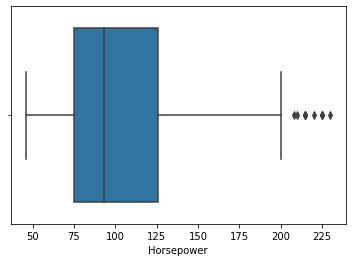

In [8]:
##looking at horsepower box plot
sns.boxplot(x=data['Horsepower'])
print("\n Are those outliers right there?, we will check again in bivariate\n")

<AxesSubplot:xlabel='Horsepower', ylabel='MPG'>

After seeing the scatter plot, all the points seem to follow the trend, no outliers here boys.


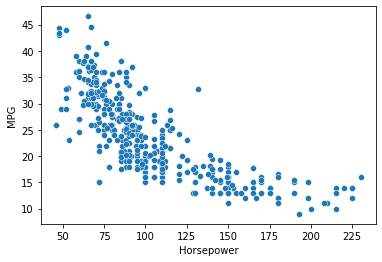

In [9]:
# bivariate - analysis
sns.scatterplot(x=data['Horsepower'], y=data['MPG'])
print("After seeing the scatter plot, all the points seem to follow the trend, no outliers here boys.")

In [10]:
##categorical varibles distribution

data["Cylinders"].value_counts() / len(data)
data['Origin'].value_counts()

4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: Cylinders, dtype: float64

1    249
3     79
2     70
Name: Origin, dtype: int64

The MPG column (target) is negatively correlated with the displacement, weight, and horsepower features


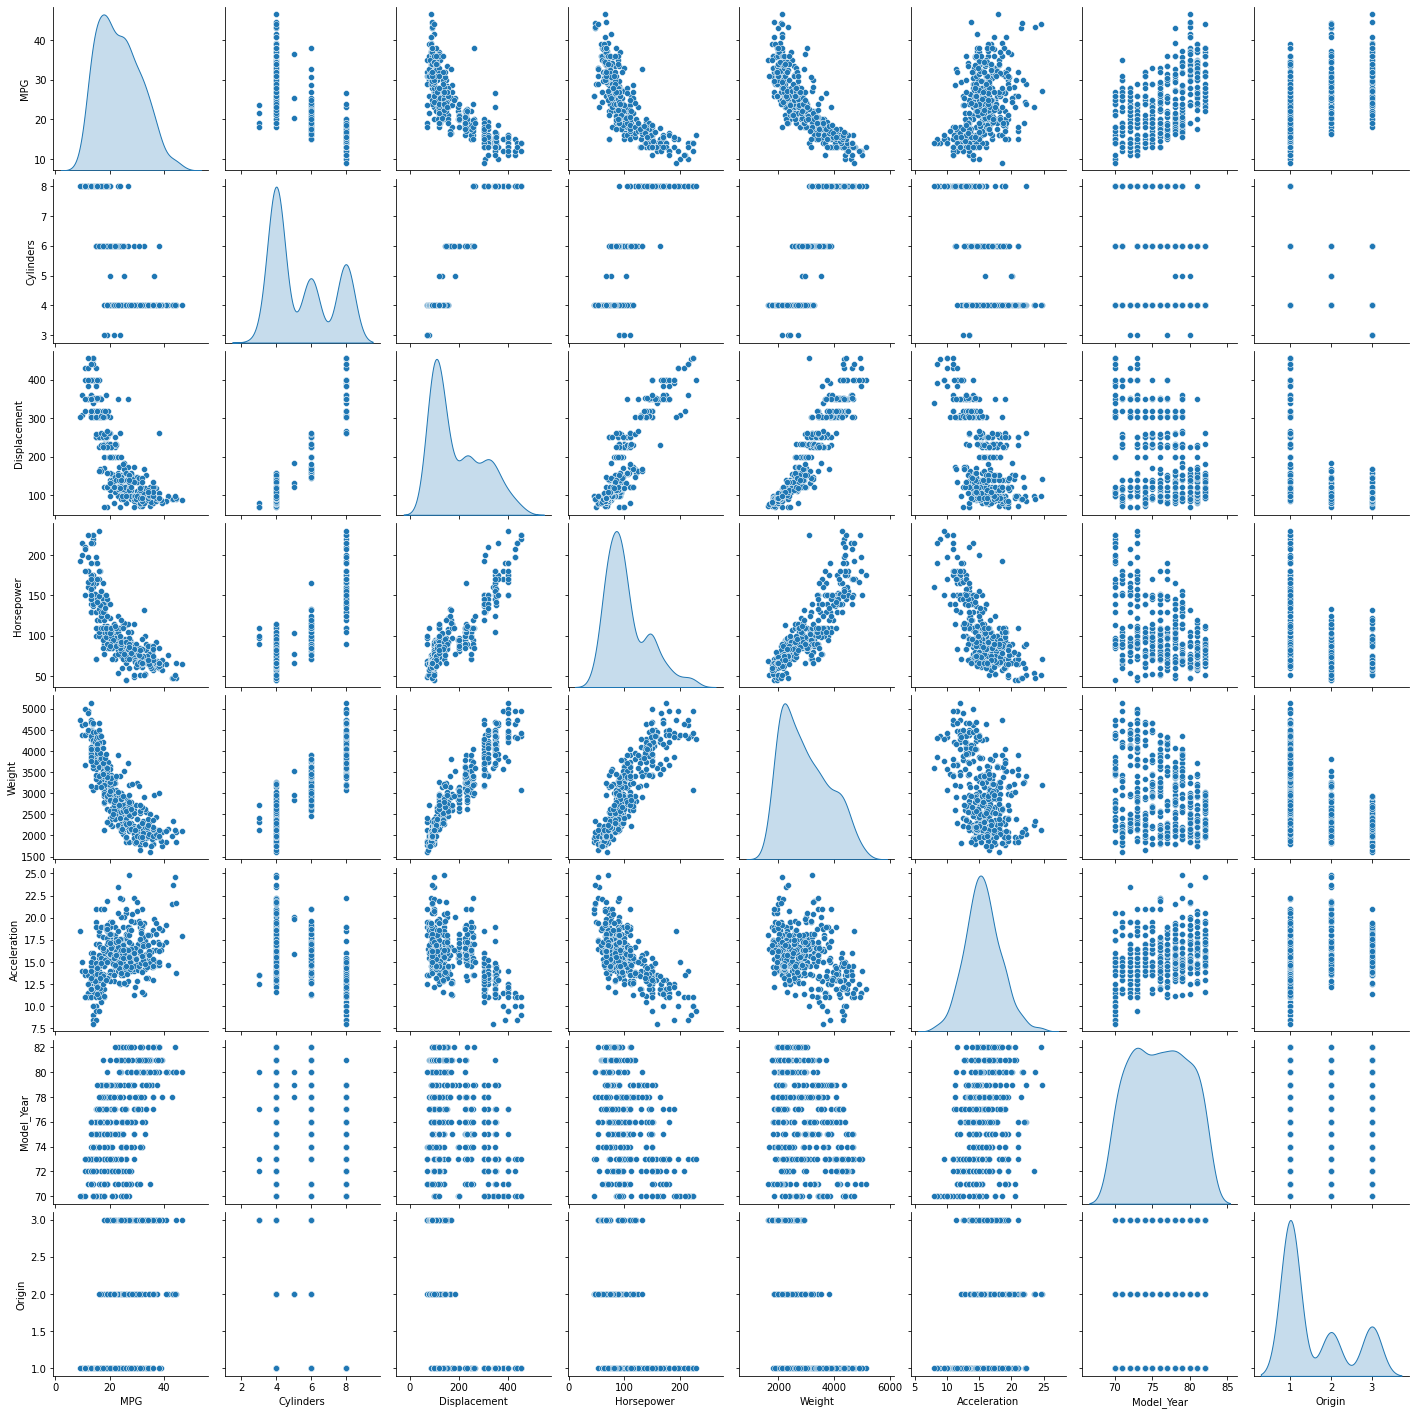

In [11]:
##pairplots to get an intuition of potential correlations

sns.pairplot(data, diag_kind="kde")

print("The MPG column (target) is negatively correlated with the displacement, weight, and horsepower features")

In [12]:
# Confirm with numbers:

corr_matrix = data.corr()
corr_matrix['MPG'].sort_values(ascending=False)

MPG             1.000000
Model_Year      0.579267
Origin          0.563450
Acceleration    0.420289
Cylinders      -0.775396
Horsepower     -0.778427
Displacement   -0.804203
Weight         -0.831741
Name: MPG, dtype: float64

## Train Test Split
--------------------

In [13]:
# Stratified sampling based on the cylinder count.

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Cylinders"]):
    train_set = data.loc[train_index]
    test_set = data.loc[test_index]
    
X_train = train_set.drop('MPG', axis=1)
X_test = test_set.drop('MPG', axis=1)
Y_train = train_set['MPG']
Y_test = test_set['MPG']

In [14]:
X_train.head()
Y_train.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,3
151,4,79.0,67.0,2000.0,16.0,74,2
388,4,156.0,92.0,2585.0,14.5,82,1
48,6,250.0,88.0,3139.0,14.5,71,1
114,4,98.0,90.0,2265.0,15.5,73,2


145    32.0
151    31.0
388    26.0
48     18.0
114    26.0
Name: MPG, dtype: float64

### Data Preprocessing
---

In [75]:
# First of all we will fill those empty values using iterative
# imputer from SKlearn to infer the best values

imputer = SimpleImputer(missing_values = np.nan,
                       strategy = 'mean')

imputer = imputer.fit(data)

data_filled = imputer.transform(data)

data_filled = pd.DataFrame(data_filled, columns=cols)

In [76]:
# Check that it was done properlly
data_filled.compare(data)

Horsepower      
           self other
32   104.469388   NaN
126  104.469388   NaN
330  104.469388   NaN
336  104.469388   NaN
354  104.469388   NaN
374  104.469388   NaN

In [77]:
# Dealing with origin data

## Converting integer classes to countries in Origin 

data_filled['Origin'] = data_filled['Origin'].map({1: 'India', 2: 'USA', 3 : 'Germany'})
data_filled.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,India
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,India
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,India
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,India
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,India


In [78]:
##one hot encoding

data_filled = pd.get_dummies(data_filled, prefix='', prefix_sep='')
data_filled.head()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Germany,India,USA
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,0,1,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,0,1,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,0,1,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,0,1,0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,0,1,0


## Functions for data preprocessing
---

In [15]:
# Defining functions for later use in training, testing and deployment

##preprocess the Origin column in data
def preprocess_origin_cols(df):
    df["Origin"] = df["Origin"].map({1: "India", 2: "USA", 3: "Germany"})
    return df

def num_pipeline_transformer(data):
    '''
    Function to process numerical transformations
    Argument:
        data: original dataframe 
    Returns:
        num_attrs: numerical dataframe
        num_pipeline: numerical pipeline object
        
    '''
    numerics = ['float64', 'int64']

    num_attrs = data.select_dtypes(include=numerics)

    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
        ])
    return num_attrs, num_pipeline

def pipeline_transformer(data):
    '''
    Complete transformation pipeline for both
    nuerical and categorical data.
    
    Argument:
        data: original dataframe 
    Returns:
        prepared_data: transformed data, ready to use
    '''
    cat_attrs = ["Origin"]
    num_attrs, num_pipeline = num_pipeline_transformer(data)
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(num_attrs)),
        ("cat", OneHotEncoder(), cat_attrs),
        ])
    prepared_data = full_pipeline.fit_transform(data)
    return prepared_data

def full_preprocess(dataframe):
    step_one = preprocess_origin_cols(dataframe)
    step_two = pipeline_transformer(step_one)
    return step_two


In [16]:
##from raw data to processed data in 2 steps

preprocessed_X_train = full_preprocess(X_train)

In [17]:
preprocessed_X_train

array([[-0.85657842, -1.07804475, -1.15192977, ...,  1.        ,
         0.        ,  0.        ],
       [-0.85657842, -1.1174582 , -0.9900351 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.85657842, -0.3587492 , -0.31547399, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.85657842, -0.56566984, -0.53133355, ...,  0.        ,
         1.        ,  0.        ],
       [-0.85657842, -0.78244384, -0.23452666, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.32260746, -0.45728283,  0.44003446, ...,  1.        ,
         0.        ,  0.        ]])

## Model Creation
---

In [18]:
lr = LinearRegression()
lr.fit(preprocessed_X_train, Y_train)

##testing the predictions with first 5 rows
sample_data = X_test.head().copy()
sample_labels = Y_test.head().copy()
sample_data_prepared = full_preprocess(sample_data)

print("Prediction of samples: ", lr.predict(sample_data_prepared))
print("Actual Labels in samples: ", list(sample_labels))

LinearRegression()

Prediction of samples:  [19.42584498 22.14932527 35.45095922 25.3002365  14.69517246]
Actual Labels in samples:  [15.0, 18.0, 40.9, 24.0, 17.0]


In [19]:
mpg_predictions = lr.predict(preprocessed_X_train)
lin_mse = mean_squared_error(Y_train, mpg_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


3.247606296804799

In [20]:
# Cross Validation on Linear Regression

scores = cross_val_score(lr, 
                         preprocessed_X_train, 
                         Y_train, 
                         scoring="neg_mean_squared_error", 
                         cv = 10)
lr_rmse_scores = np.sqrt(-scores)


In [21]:
lr_rmse_scores

array([2.92804547, 3.89576992, 3.88205716, 2.99499864, 2.81878897,
       3.16602459, 3.7465558 , 2.76516656, 3.8307213 , 3.27545957])

## GridSearchCV on RandomForestRegressor
---

In [22]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           cv=10,
                          )

grid_search.fit(preprocessed_X_train, Y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [23]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [24]:
cv_scores = grid_search.cv_results_

In [25]:
# printing all parameters and their scores

for mean_score, params in zip(cv_scores['mean_test_score'], cv_scores['params']):
    print(np.sqrt(-mean_score), params)

3.189847350590884 {'max_features': 2, 'n_estimators': 3}
2.887577144270418 {'max_features': 2, 'n_estimators': 10}
2.776086019284981 {'max_features': 2, 'n_estimators': 30}
3.161790459029509 {'max_features': 4, 'n_estimators': 3}
2.856114334676036 {'max_features': 4, 'n_estimators': 10}
2.7183642481661443 {'max_features': 4, 'n_estimators': 30}
3.096752150225832 {'max_features': 6, 'n_estimators': 3}
2.8279345930378232 {'max_features': 6, 'n_estimators': 10}
2.671842193881476 {'max_features': 6, 'n_estimators': 30}
3.6605942507763958 {'max_features': 8, 'n_estimators': 3}
2.8145005949173867 {'max_features': 8, 'n_estimators': 10}
2.6348529906349736 {'max_features': 8, 'n_estimators': 30}
2.866998156159043 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
2.8024326504093984 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3.0189862354414516 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2.8495391477104985 {'bootstrap': False, 'max_features': 3, 'n_estimat

In [26]:
# feature importances
feature_importances = grid_search.best_estimator_.feature_importances_

numerics = ['float64', 'int64']
num_attrs = list(X_train.select_dtypes(include=numerics))

sorted(zip(num_attrs, feature_importances), reverse=True)

[('Weight', 0.2155073584492896),
 ('Model_Year', 0.124355032034093),
 ('Horsepower', 0.15137588078606787),
 ('Displacement', 0.34957314644723875),
 ('Cylinders', 0.12123677841668522),
 ('Acceleration', 0.030138495162287424)]

In [27]:
ranked_features = (sorted(zip(num_attrs, feature_importances), reverse=True))
ranked_features

[('Weight', 0.2155073584492896),
 ('Model_Year', 0.124355032034093),
 ('Horsepower', 0.15137588078606787),
 ('Displacement', 0.34957314644723875),
 ('Cylinders', 0.12123677841668522),
 ('Acceleration', 0.030138495162287424)]

In [41]:
# Save feature importance to csv for later use in graphics
with open('features_ranked.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['feature','importance'])
    for row in ranked_features:
        csv_out.writerow(row)


20

28

32

32

34

28

35

In [28]:
##capturing the best configuration
final_model = grid_search.best_estimator_

##preprocessing the test data origin column
X_test_preprocessed = preprocess_origin_cols(X_test)

##preparing the data with final transformation
X_test_prepared = pipeline_transformer(X_test_preprocessed)

##making final predictions
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)


In [29]:
final_rmse

2.897139705333905

In [30]:
##dump the model into a file
with open("model.bin", 'wb') as f_out:
    pickle.dump(final_model, f_out) # write final_model in .bin file
    f_out.close()  # close the file 

In [34]:
# Function for predicting on server side from json querying
def predict_mpg(config, model):
    
    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config
    
    preproc_df = preprocess_origin_cols(df)
    prepared_df = pipeline_transformer(preproc_df)
    y_pred = model.predict(prepared_df)
    return y_pred

# Function for predicting on server side from json querying
def predict_mpg_test(config, model):
    
    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config
    
    prepared_df = full_preprocess(df)
    y_pred = model.predict(prepared_df)
    return y_pred

In [31]:
# Import model for testing
with open("model.bin", 'rb') as f_in:
    model = pickle.load(f_in)

In [35]:
##checking it on a random sample
vehicle_config = {
    'Cylinders': [4, 6, 8],
    'Displacement': [155.0, 160.0, 165.5],
    'Horsepower': [93.0, 130.0, 98.0],
    'Weight': [2500.0, 3150.0, 2600.0],
    'Acceleration': [15.0, 14.0, 16.0],
    'Model Year': [81, 80, 78],
    'Origin': [3, 2, 1]
}

vehicle_config_2 = {
    'Cylinders': [8],
    'Displacement': [165.5],
    'Horsepower': [98.0],
    'Weight': [2600.0],
    'Acceleration': [16.0],
    'Model Year': [78],
    'Origin': [1]
}

In [36]:
predict_mpg_test(vehicle_config, model)
full_preprocess(pd.DataFrame(vehicle_config))

array([34.02666667, 17.02666667, 19.39      ])

array([[-1.22474487, -1.20484922, -0.85412443, -0.87481777,  0.        ,
         1.06904497,  1.        ,  0.        ,  0.        ],
       [ 0.        , -0.0388661 ,  1.40320441,  1.39970842, -1.22474487,
         0.26726124,  0.        ,  0.        ,  1.        ],
       [ 1.22474487,  1.24371532, -0.54907999, -0.52489066,  1.22474487,
        -1.33630621,  0.        ,  1.        ,  0.        ]])

## Testing Zone - END of Project
---

In [37]:
att, pipe = num_pipeline_transformer(pd.DataFrame(vehicle_config_2))

list(att)

pipe

['Cylinders',
 'Displacement',
 'Horsepower',
 'Weight',
 'Acceleration',
 'Model Year',
 'Origin']

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler())])

In [39]:
pipeline_transformer(pd.DataFrame(vehicle_config))
pipeline_transformer(pd.DataFrame(vehicle_config_2))

array([[-1.22474487, -1.20484922, -0.85412443, -0.87481777,  0.        ,
         1.06904497,  1.22474487,  0.        ,  0.        ,  1.        ],
       [ 0.        , -0.0388661 ,  1.40320441,  1.39970842, -1.22474487,
         0.26726124,  0.        ,  0.        ,  1.        ,  0.        ],
       [ 1.22474487,  1.24371532, -0.54907999, -0.52489066,  1.22474487,
        -1.33630621, -1.22474487,  1.        ,  0.        ,  0.        ]])

array([[0., 0., 0., 0., 0., 0., 0., 1.]])

In [43]:
features = pd.read_csv('features_ranked.csv')

In [44]:
features

,feature,importance
0,Weight,0.210847
1,Model_Year,0.125286
2,Horsepower,0.146143
3,Displacement,0.286340
4,Cylinders,0.199185
5,Acceleration,0.026169


In [52]:
features['feature'][0]

'Weight'

In [47]:
cat_attrs = ['Origin']
num_attrs, num_pipeline = num_pipeline_transformer(pd.DataFrame(vehicle_config_2))
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, list(num_attrs)),
    ('cat', OneHotEncoder(), cat_attrs),
])

In [48]:
full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['Cylinders', 'Displacement', 'Horsepower',
                                  'Weight', 'Acceleration', 'Model Year',
                                  'Origin']),
                                ('cat', OneHotEncoder(), ['Origin'])])

In [51]:
full_pipeline.fit_transform(pd.DataFrame(vehicle_config_2))

array([[0., 0., 0., 0., 0., 0., 0., 1.]])